In [1]:
from gym import Env
from gym.spaces import Discrete, Box
import numpy as np
from State import State


In [2]:
env = State()
env.create_state([-1,0,0])

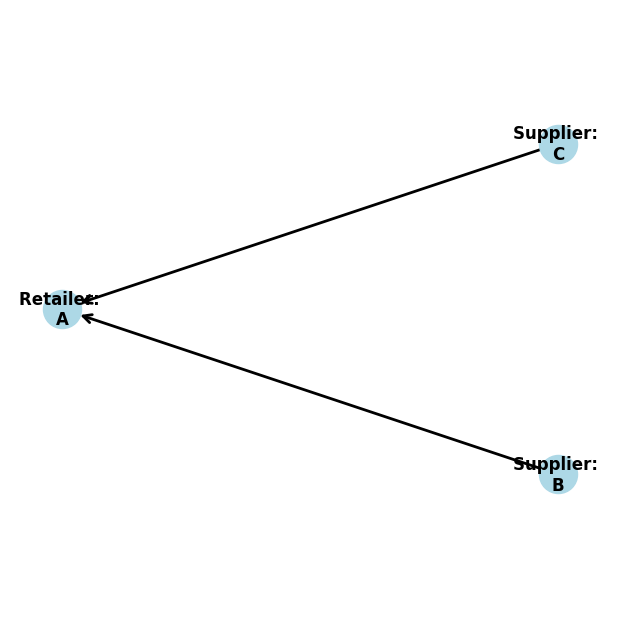

In [3]:
env.show_network()

In [4]:
env.observation_space.sample()

array([ 35, 737, 446, 790], dtype=int64)

In [5]:
episodes = 10
for episode in range(1, episodes+1):
    state = env.reset()
    done = False
    score = 0 
    
    while not done:
        #env.render()
        action = env.action_space.sample()
        print(type(action))
        print("action" + str(action))
        n_state, reward, done, info = env.step(action)
        score+=reward
    print('Episode:{} Score:{}'.format(episode, score))

<class 'int'>
action15
<class 'int'>
action41
<class 'int'>
action42
<class 'int'>
action41
<class 'int'>
action1
<class 'int'>
action4
<class 'int'>
action28
<class 'int'>
action40
<class 'int'>
action61
<class 'int'>
action16
<class 'int'>
action24
<class 'int'>
action38
<class 'int'>
action35
<class 'int'>
action48
<class 'int'>
action17
<class 'int'>
action40
<class 'int'>
action72
<class 'int'>
action64
<class 'int'>
action43
<class 'int'>
action60
<class 'int'>
action18
<class 'int'>
action26
<class 'int'>
action42
<class 'int'>
action61
Episode:1 Score:-2907.4400000000005
<class 'int'>
action20
<class 'int'>
action70
<class 'int'>
action4
<class 'int'>
action51
<class 'int'>
action5
<class 'int'>
action8
<class 'int'>
action40
<class 'int'>
action32
<class 'int'>
action42
<class 'int'>
action47
<class 'int'>
action36
<class 'int'>
action45
<class 'int'>
action9
<class 'int'>
action53
<class 'int'>
action8
<class 'int'>
action20
<class 'int'>
action0
<class 'int'>
action66
<class

c:\Users\User\Desktop\Nus_Stuff\Forecasters\RLsrc\Demandable.py:345: RuntimeWarning: invalid value encountered in double_scalars
  return total * self.holding_cost


In [7]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.optimizers import Adam
from rl.agents import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory

from rl.agents import DDPGAgent

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
states = env.observation_space.shape
actions = env.action_space.n

In [ ]:
states

In [ ]:
actions

In [ ]:
def build_model(states, actions):
    model = Sequential()    
    model.add(Dense(64, activation='relu', input_shape=(1,4)))
    model.add(Dense(64, activation='relu'))
    model.add(Flatten())
    model.add(Dense(actions, activation='linear'))
    return model

In [ ]:
model = build_model(states, actions)


In [ ]:
model.summary()

In [ ]:
def build_agent(model, actions):
    policy = BoltzmannQPolicy()
    memory = SequentialMemory(limit=50000, window_length=1)
    dqn = DQNAgent(model=model, memory=memory, policy=policy, 
                  nb_actions=actions, nb_steps_warmup=50, target_model_update=1e-2)
    return dqn

In [ ]:
dqn = build_agent(model, actions)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])
dqn.fit(env, nb_steps=5000, visualize=False, verbose=1)

In [ ]:
scores = dqn.test(env, nb_episodes=100, visualize=False)
print(np.mean(scores.history['episode_reward']))

In [ ]:

_ = dqn.test(env, nb_episodes=15, visualize=True)